# movie reviews - positive vs negative

# nltk, stopwords

In [87]:
import nltk
import collections
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
# positive reviews 5개, negative reviews 5개
pos1 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv000_29416.txt', encoding='utf8')
pos2 = open('/Users/Woody/nltk_data/corpora/movie_reviews/pos/cv001_18431.txt', encoding='utf8')
pos3 = open('/Users/Woody/nltk_data/corpora/movie_reviews/pos/cv002_15918.txt', encoding='utf8')
pos4 = open('/Users/Woody/nltk_data/corpora/movie_reviews/pos/cv003_11664.txt', encoding='utf8')
pos5 = open('/Users/Woody/nltk_data/corpora/movie_reviews/pos/cv004_11636.txt', encoding='utf8')

neg1 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv000_29416.txt', encoding='utf8')
neg2 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv001_19502.txt', encoding='utf8')
neg3 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv002_17424.txt', encoding='utf8')
neg4 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv003_12683.txt', encoding='utf8')
neg5 = open('/Users/Woody/nltk_data/corpora/movie_reviews/neg/cv004_12641.txt', encoding='utf8')

In [22]:
# 5개 병합
pos = pos1.read() + pos2.read() + pos3.read() + pos4.read() + pos5.read()
neg = neg1.read() + neg2.read() + neg3.read() + neg4.read() + neg5.read()

In [69]:
# pos

In [70]:
# neg

In [71]:
# positive reviews stopwords
stopwords_pos = set(line.strip() for line in open('stopwords_pos.txt')) # 익명함수, "클러저"
# stopwords_pos # set구조: {}

In [101]:
# 불용어 추가
stopwords_pos = stopwords_pos.union(set(['that', 'as', 'an', 'by', 'from', 'he', 'have', 'they', 'was', '?', "it's", 'about', 'even', 'because', 'has', 'what', 'be', 'who', 'not', 'we', 'or', 'how', 'us', "doesn't", 'him', 'which']))

In [102]:
wordcount_pos = {}
for word in pos.lower().split(): 
    word = word.replace(".", "")
    word = word.replace(",", "")
    word = word.replace(":", "")
    word = word.replace("\"", "")
    word = word.replace("*", "")
    
    if word not in stopwords_pos:
        if word not in wordcount_pos: # 없다
            wordcount_pos[word] = 1
        else: # 이미 있다
            wordcount_pos[word] += 1

In [103]:
# 1~5등 뽑기
word_counter_pos = collections.Counter(wordcount_pos)
n_print = int(input('how many list >> '))
for word, count in word_counter_pos.most_common(n_print):
    print(word, ': ', count)

how many list >>  10


like :  20
film :  18
movie :  16
shark :  15
jackie :  10
most :  9
more :  8
than :  8
jaws :  8
just :  7


In [104]:
# negative reviews stopwords
stopwords_neg = set(line.strip() for line in open('stopwords_neg.txt')) # 익명함수, "클러저"
# stopwords_neg # set구조: {}

In [117]:
# 불용어 추가
stopwords_neg = stopwords_neg.union(set(['as', 'be', 'that', 'from', '?', 'an', "it's", 'they', 'we', 'at', 'which']))

In [118]:
wordcount_neg = {}
for word in neg.lower().split(): 
    word = word.replace(".", "")
    word = word.replace(",", "")
    word = word.replace(":", "")
    word = word.replace("\"", "")
    word = word.replace("*", "")
    
    if word not in stopwords_neg:
        if word not in wordcount_neg: # 없다
            wordcount_neg[word] = 1
        else: # 이미 있다
            wordcount_neg[word] += 1

In [119]:
# 1~5등 뽑기
word_counter_neg = collections.Counter(wordcount_neg)
n_print = int(input('how many list >> '))
for word, count in word_counter_neg.most_common(n_print):
    print(word, ': ', count)

how many list >>  10


film :  16
movie :  15
not :  15
even :  14
like :  12
stalked :  11
just :  9
no :  9
most :  8
really :  8


In [123]:
# RAM 날리기. CPU 최적화
pos1.close()
pos2.close()
pos3.close()
pos4.close()
pos5.close()

neg1.close()
neg2.close()
neg3.close()
neg4.close()
neg5.close()

In [129]:
# 데이터프레임에 담기
list_pos = word_counter_pos.most_common(n_print)
list_neg = word_counter_neg.most_common(n_print)

df_pos = pd.DataFrame(list_pos, columns=['Word_pos', 'Count_pos'])
df_neg = pd.DataFrame(list_neg, columns=['Word_neg', 'Count_neg'])
df_pos, df_neg

(  Word_pos  Count_pos
 0     like         20
 1     film         18
 2    movie         16
 3    shark         15
 4   jackie         10
 5     most          9
 6     more          8
 7     than          8
 8     jaws          8
 9     just          7,
   Word_neg  Count_neg
 0     film         16
 1    movie         15
 2      not         15
 3     even         14
 4     like         12
 5  stalked         11
 6     just          9
 7       no          9
 8     most          8
 9   really          8)

In [132]:
df = pd.concat([df_pos, df_neg], axis=1)
df

,Word_pos,Count_pos,Word_neg,Count_neg
0,like,20,film,16
1,film,18,movie,15
2,movie,16,not,15
3,shark,15,even,14
4,jackie,10,like,12
5,most,9,stalked,11
6,more,8,just,9
7,than,8,no,9
8,jaws,8,most,8
9,just,7,really,8


<AxesSubplot:xlabel='Word_pos'>

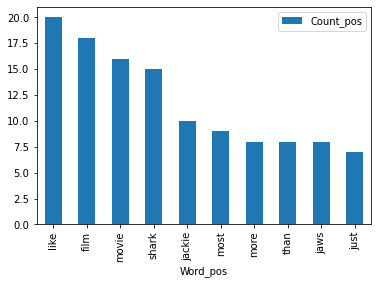

In [133]:
df.plot.bar(x='Word_pos', y='Count_pos')

<AxesSubplot:xlabel='Word_neg'>

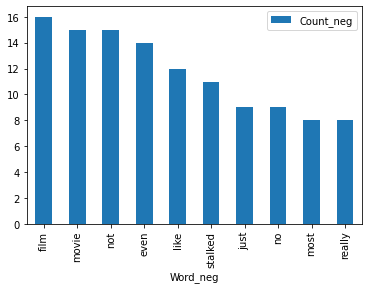

In [134]:
df.plot.bar(x='Word_neg', y='Count_neg')

# tokenize

In [6]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer # 문장단위, 단어단위, 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import Text

In [7]:
posfile = open('movie_review_nltk_data/pos.txt', encoding='utf8')
pos = posfile.read()
negfile = open('movie_review_nltk_data/neg.txt', encoding='utf8')
neg = negfile.read()

In [9]:
retokenize = RegexpTokenizer("[\w]+") # 문자로 시작하는 것들. 쉼표 같은 특수문자 X

In [10]:
pos_text = Text(retokenize.tokenize(pos))
neg_text = Text(retokenize.tokenize(neg))

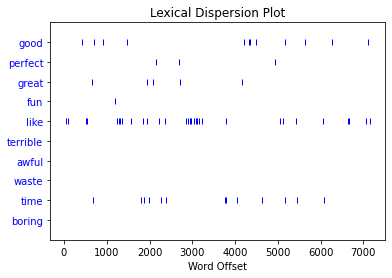

In [11]:
pos_text.dispersion_plot(["good", "perfect", "great", "fun", "like", "terrible", "awful", "waste", "time", "boring"])

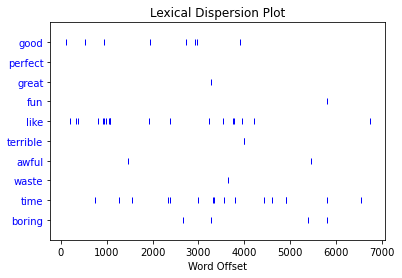

In [12]:
neg_text.dispersion_plot(["good", "perfect", "great", "fun", "like", "terrible", "awful", "waste", "time", "boring"])

# FreqDist

In [73]:
# positive reviews stopwords
stopwords_pos = set(line.strip() for line in open('stopwords_pos.txt'))
stopwords_pos = stopwords_pos.union(set(['t', 'shark', 's', 'that', 'as', 'an', 'by', 'from', 'he', 'have', 'they', 'was', '?', "it's", 'about', 'even', 'because', 'has', 'what', 'be', 'who', 'not', 'we', 'or', 'how', 'us', "doesn't", 'him', 'which']))

# negative reviews stopwords
stopwords_neg = set(line.strip() for line in open('stopwords_neg.txt'))
stopwords_neg = stopwords_neg.union(set(['s', 'as', 'be', 'that', 'from', '?', 'an', "it's", 'they', 'we', 'at', 'which']))

In [74]:
from nltk import FreqDist
from nltk.tag import pos_tag

pos_tokens = pos_tag(retokenize.tokenize(pos))
neg_tokens = pos_tag(retokenize.tokenize(neg))

In [75]:
# pos_tokens, neg_tokens

In [76]:
pos_list = [t[0] for t in pos_tokens if t[1] == "NN" and t[0] not in stopwords_pos]
fd_pos = FreqDist(pos_list)

neg_list = [t[0] for t in neg_tokens if t[1] == "NN" and t[0] not in stopwords_neg]
fd_neg = FreqDist(neg_list)

fd_pos, fd_neg

(FreqDist({'performance': 17, 'story': 17, 'lumumba': 13, 'life': 12, 'alda': 12, 'character': 11, 'jackie': 10, 'wedding': 10, 'school': 9, 'money': 9, ...}),
 FreqDist({'audience': 10, 'john': 10, 'plot': 9, 'story': 8, 'course': 8, 'grant': 8, 'mess': 7, 'world': 7, 'character': 7, 'carpenter': 7, ...}))

In [77]:
fd_pos.most_common(5)

[('performance', 17),
 ('story', 17),
 ('lumumba', 13),
 ('life', 12),
 ('alda', 12)]

In [78]:
fd_neg.most_common(5)

[('audience', 10), ('john', 10), ('plot', 9), ('story', 8), ('course', 8)]

# text retokenize

In [82]:
pos_text = Text(retokenize.tokenize(pos))
neg_text = Text(retokenize.tokenize(neg))

In [85]:
pos_text.similar('performance')

life arrival wedding uncanny direction


In [84]:
neg_text.similar('audience')

movie film plot characters make way director craziness genre crow
story acting late hour fact boy love woman stalker buildup


# WordCloud

In [79]:
from wordcloud import WordCloud

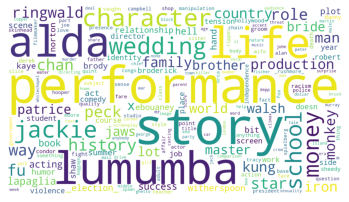

In [96]:
wc = WordCloud(width=1920, height=1080, background_color='white', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_pos))
plt.axis("off")
plt.show()

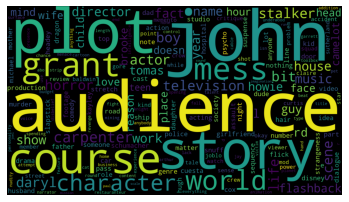

In [97]:
wc = WordCloud(width=1920, height=1080, background_color='black', random_state=0)
plt.imshow(wc.generate_from_frequencies(fd_neg))
plt.axis("off")
plt.show()